In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
deaths = pd.read_csv('auto_fatalities.csv')
deaths.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [3]:
deaths.columns = ['State',
       'Number in fatal collisions per 1e9 miles',
       'Speeding',
       'Alcohol-Impaired',
       'Not Distracted',
       'No Previous Accidents',
       'Car Insurance Premiums ($)',
       'Losses incurred by insurance companies for collisions per insured driver ($)']

deaths['Distracted'] = 100 - deaths['Not Distracted']
deaths.drop('Not Distracted', axis=1, inplace=True)

In [4]:
deaths.head()

,State,Number in fatal collisions per 1e9 miles,Speeding,Alcohol-Impaired,No Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Distracted
0,Alabama,18.8,39,30,80,784.55,145.08,4
1,Alaska,18.1,41,25,94,1053.48,133.93,10
2,Arizona,18.6,35,28,96,899.47,110.35,16
3,Arkansas,22.4,18,26,95,827.34,142.39,6
4,California,12.0,35,28,89,878.41,165.63,9


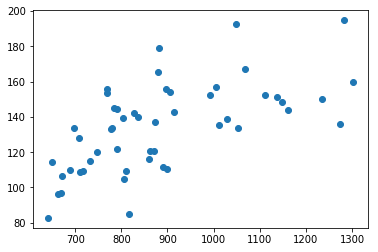

In [5]:
plt.scatter(deaths['Car Insurance Premiums ($)'], deaths['Losses incurred by insurance companies for collisions per insured driver ($)'])
plt.show()

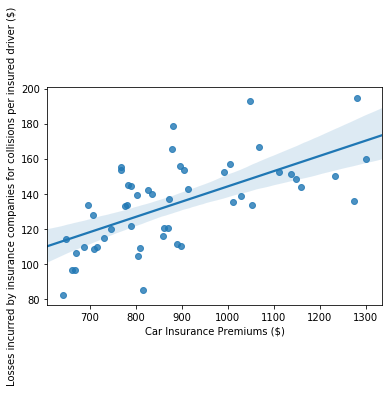

In [6]:
sns.regplot(deaths['Car Insurance Premiums ($)'], deaths['Losses incurred by insurance companies for collisions per insured driver ($)'])
plt.show()

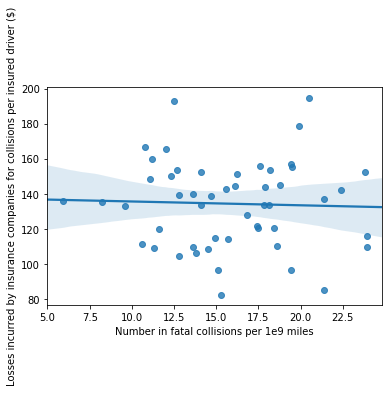

In [7]:
sns.regplot(deaths['Number in fatal collisions per 1e9 miles'], deaths['Losses incurred by insurance companies for collisions per insured driver ($)'])
plt.show()

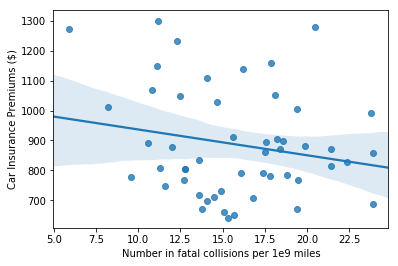

In [8]:
sns.regplot(deaths['Number in fatal collisions per 1e9 miles'], deaths['Car Insurance Premiums ($)'])
plt.show()

In [9]:
deaths['diff_speed_alc'] = deaths['Speeding'] - deaths['Alcohol-Impaired']
deaths['diff_speed_distracted_v_alc'] = deaths['Distracted'] - deaths['Alcohol-Impaired']
deaths['diff_speed_distracted_v_speeding'] = deaths['Distracted'] - deaths['Speeding']
deaths.head()

,State,Number in fatal collisions per 1e9 miles,Speeding,Alcohol-Impaired,No Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Distracted,diff_speed_alc,diff_speed_distracted_v_alc,diff_speed_distracted_v_speeding
0,Alabama,18.8,39,30,80,784.55,145.08,4,9,-26,-35
1,Alaska,18.1,41,25,94,1053.48,133.93,10,16,-15,-31
2,Arizona,18.6,35,28,96,899.47,110.35,16,7,-12,-19
3,Arkansas,22.4,18,26,95,827.34,142.39,6,-8,-20,-12
4,California,12.0,35,28,89,878.41,165.63,9,7,-19,-26


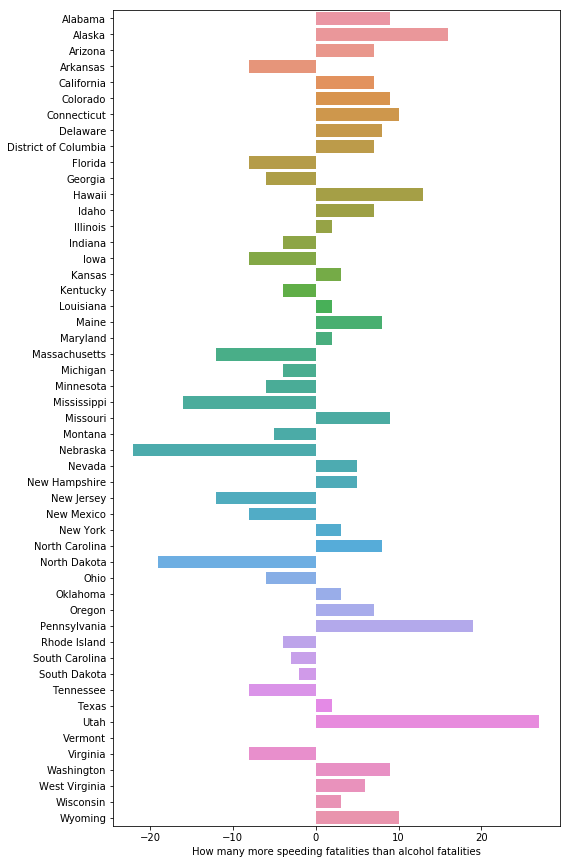

In [10]:
f, ax = plt.subplots(figsize=(8,15))
sns.barplot(deaths.diff_speed_alc, deaths.State)
ax.set(ylabel="", xlabel="How many more speeding fatalities than alcohol fatalities")
plt.show()

Speeding leads to more fatalities than alcohol in about half of US states, though most are within 20% of each other.

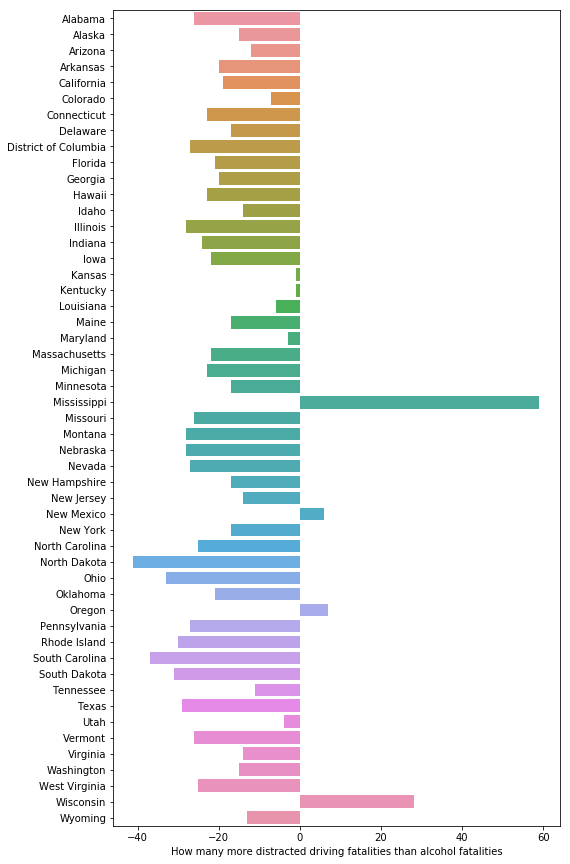

In [11]:
f, ax = plt.subplots(figsize=(8,15))
sns.barplot(deaths.diff_speed_distracted_v_alc, deaths.State)
ax.set(ylabel="", xlabel="How many more distracted driving fatalities than alcohol fatalities")
plt.show()

Distracted driving leads to more fatalities than alcohol in only a few states, though the numbers are similar for a few more than that. If we say that less than 20% difference is insignificant, then a majority of states have fatality rates similar for alcohol and distracted driving.

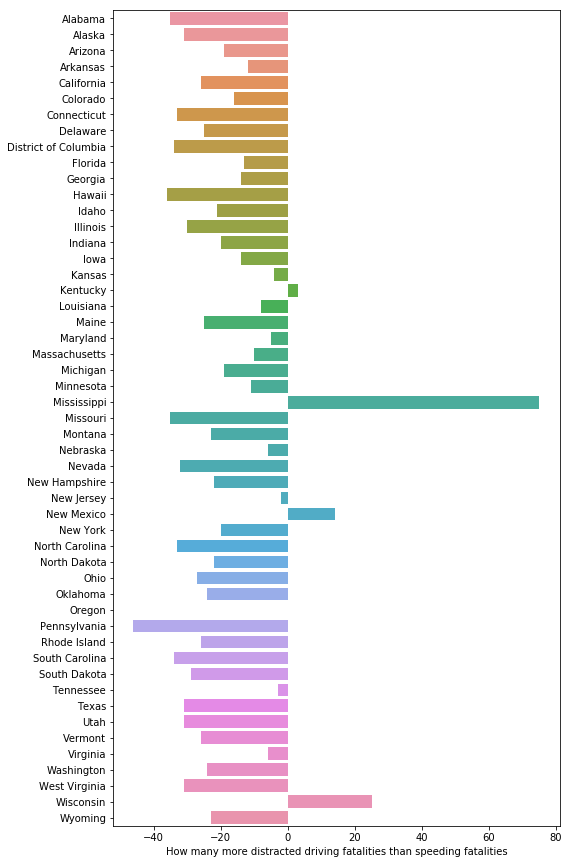

In [12]:
f, ax = plt.subplots(figsize=(8,15))
sns.barplot(deaths.diff_speed_distracted_v_speeding, deaths.State)
ax.set(ylabel="", xlabel="How many more distracted driving fatalities than speeding fatalities")
plt.show()

Speeding is more contributory to fatalities than distracted driving in most states. Mississippi looks like an outlier with nearly 80% more fatalities due to distracted driving than speeding, especially considering how similar most of the other states are.

In [13]:
deaths2 = deaths[['State',
       'Speeding',
       'Alcohol-Impaired',
       'Distracted',
       'No Previous Accidents']]

deaths2.head()

,State,Speeding,Alcohol-Impaired,Distracted,No Previous Accidents
0,Alabama,39,30,4,80
1,Alaska,41,25,10,94
2,Arizona,35,28,16,96
3,Arkansas,18,26,6,95
4,California,35,28,9,89


In [14]:
deaths2 = pd.melt(deaths2, id_vars="State", var_name="Category", value_name="Percentage")
deaths2.head(20)

,State,Category,Percentage
0,Alabama,Speeding,39
1,Alaska,Speeding,41
2,Arizona,Speeding,35
3,Arkansas,Speeding,18
4,California,Speeding,35
5,Colorado,Speeding,37
6,Connecticut,Speeding,46
7,Delaware,Speeding,38
8,District of Columbia,Speeding,34
9,Florida,Speeding,21


In [15]:
states = deaths.State.tolist()

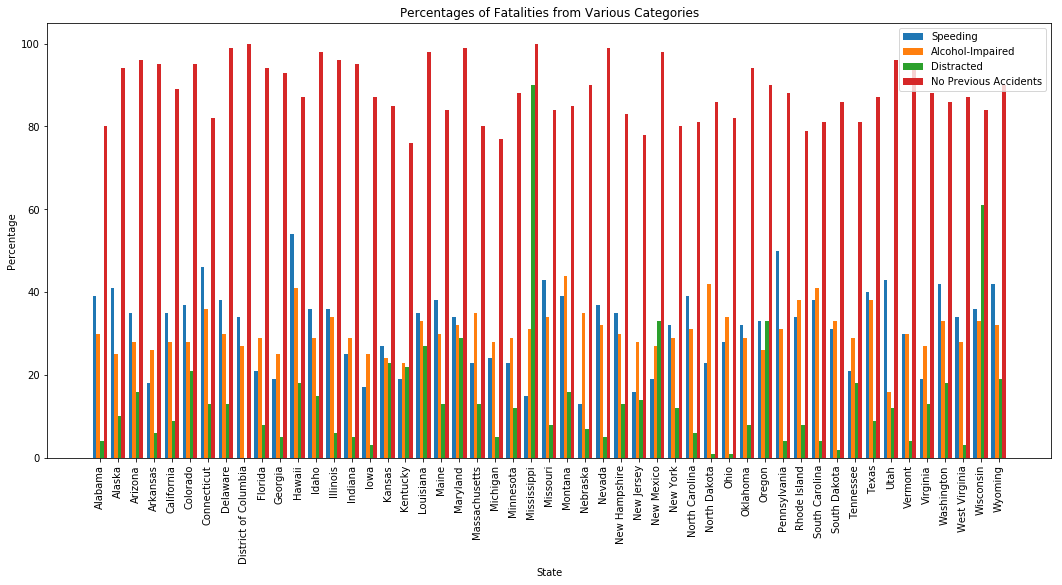

In [16]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
x = np.arange(51)
plt.bar(x-.3, deaths['Speeding'], width=0.2, label='Speeding')
plt.bar(x-.1, deaths['Alcohol-Impaired'], width=0.2, label='Alcohol-Impaired')
plt.bar(x+.1, deaths['Distracted'], width=0.2, label='Distracted')
plt.bar(x+.3, deaths['No Previous Accidents'], width=0.2, label='No Previous Accidents')
plt.xticks(x, states, rotation=90)
ax.legend(loc="upper right", frameon=True)
ax.set_xlabel('State')
ax.set_ylabel('Percentage')
ax.set_title('Percentages of Fatalities from Various Categories')
plt.show()